Importing Necessary Libraries

# Program 2: Fashion MNIST

**Name:** SOURABH S  
**Reg No:** KH.EN.P2MCA25157  
**Course:** MCA B (AI & DS)  
**Batch:** 2025–2027  

---



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset using minst dataset module
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#saving it as training set and test set( split it as )

In [3]:
x_train.shape
#60000 images of 28x28 pixels in training set)

(60000, 28, 28)

In [4]:
x_test.shape
#10000 images of 28x28 pixels in test set)

(10000, 28, 28)

In [5]:
print(y_test)
#labels of test set

[9 2 1 ... 8 1 5]


In [6]:
#Displaying Sample Images from the MNIST Dataset
# Select random indices for displaying images
import numpy as np
indices = np.random.randint(0, x_train.shape[0], size=16)

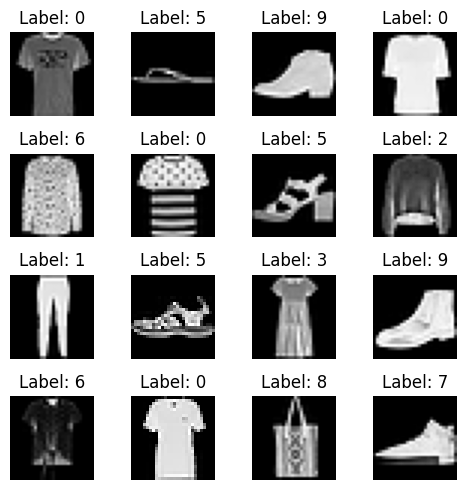

In [7]:
# Create a figure and subplots
fig, axes = plt.subplots(4, 4, figsize=(5, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, ax in enumerate(axes):
    image = x_train[indices[i]]
    label = y_train[indices[i]]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Reshape data for CNN input
#CNNs expect input data to have a specific shape, typically (num_samples, img_rows, img_cols, num_channels).
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)#shape[0] = how many images we have, 28x28 is the size of each image, and 1 is the number of channels (grayscale)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


In [9]:
x_train.shape
#x_test.shape 
#1 stands for 1 channel , if color images we will have 3 channels (RGB)

(60000, 28, 28, 1)

In [10]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0 # To normalize the pixel values, we divide by 255 (the maximum pixel value for grayscale images).
x_test = x_test / 255.0

In [11]:
# Convert class vectors to binary class matrices

num_classes = 10 # Number of classes in the MNIST dataset (digits 0-9)
y_train = to_categorical(y_train, num_classes) #1 hotencoding the labels
y_test = to_categorical(y_test, num_classes)


In [12]:
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
# Create a CNN model
model = Sequential()# 32 kernels , general we choose odd dimension for kernal size (3,3) , activation function is relu
model.add(Conv2D(32, kernel_size=(3, 3),strides=(1,1),padding='same', activation='relu', input_shape=(28, 28, 1)))#convolution layer with 32 filters, a kernel size of 3x3, and ReLU activation function. The input shape is specified as (28, 28, 1) for grayscale images.
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))#2 x 2 blank kernal
model.add(Flatten()) # only 1 convolution layer and 1 pooling layer, so we need to flatten the output to feed it into the dense layers
model.add(Dense(128, activation='relu'))#128 neurons or any no of neurons THIS IS HIDDEN LAYER
model.add(Dense(num_classes, activation='softmax'))#according to the no of neurons we want , softmax (output the probability) is used for multi class classification Output layer with 'num_classes' neurons and softmax activation function, which is suitable for multi-class classification problems.

c:\Users\user\Desktop\MCA AI DS 2027\S2\Deep Learning\Lab\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#this is a classification Problem so we use categorical_crossentropy as the loss function, adam is an optimization algorithm that adjusts the learning rate during training, and we want to track accuracy as a metric.
# 2 class classfiction , them binary_crossentropy use karte hai
# advanced optimizers : RMSprop, Adam, Adagrad, Adadelta
#accuracy to evaluate the model , trained well or not 

In [15]:
# Train the model
#model.fit() standard attributes
# history variable will store the training history, which includes the loss and accuracy values for each epoch. We can use this information to analyze the training process and visualize the learning curves later on.
# Trying to train model with x_train and y_train  , batch size of 128 each , total batches = 60000 /128
#epoch = can be decided by us , 
#get trained batch wise , accuracy is the training set accuracy , then the test set accuracy , First epoch the loss is high 
history=model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8428 - loss: 0.4483 - val_accuracy: 0.8797 - val_loss: 0.3456
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8947 - loss: 0.2980 - val_accuracy: 0.8903 - val_loss: 0.3093
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9079 - loss: 0.2570 - val_accuracy: 0.9001 - val_loss: 0.2754
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9172 - loss: 0.2268 - val_accuracy: 0.9007 - val_loss: 0.2742
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9255 - loss: 0.2045 - val_accuracy: 0.9071 - val_loss: 0.2600
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9317 - loss: 0.1876 - val_accuracy: 0.9129 - val_loss: 0.2503
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9382 - loss: 0.1700 - val_accuracy: 0.9126 - val_loss: 0.2482
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9433 - loss: 0.1542 - 

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,413,664 (9.21 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,609,110 (6.14 MB)

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9121 - loss: 0.2667
Test accuracy: 0.9121000170707703


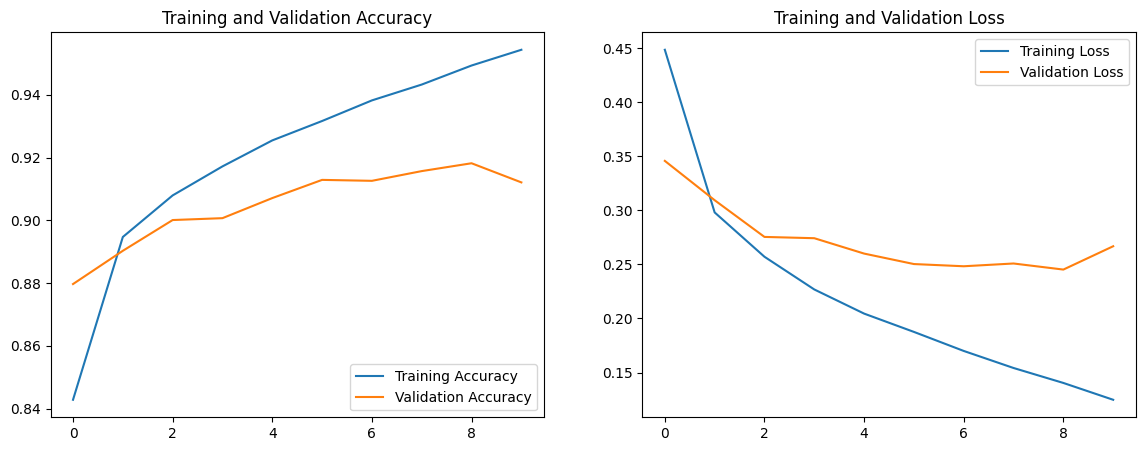

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()